In [96]:
# This cell courtesy of the starter code writer.

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [97]:
# My additional imports

import json
import datetime


In [98]:
# This cell courtesy of the starter code writer

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_identn = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city_id = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_count = len(cities)
cities_count

617

In [99]:
print(cities)

['solnechnyy', 'punta arenas', 'hilo', 'korla', 'lebu', 'gat', 'albany', 'bredasdorp', 'ribeira grande', 'hithadhoo', 'yellowknife', 'la ronge', 'mataura', 'fortuna', 'taolanaro', 'chuy', 'jamestown', 'bengkulu', 'mar del plata', 'tasiilaq', 'avarua', 'cidreira', 'rikitea', 'cockburn town', 'port alfred', 'hobart', 'new norfolk', 'barrow', 'saint-francois', 'tezu', 'upernavik', 'el naranjo', 'port dickson', 'cuamba', 'nizhneyansk', 'pevek', 'ancud', 'illoqqortoormiut', 'huarmey', 'vaitupu', 'scarborough', 'ryotsu', 'butaritari', 'marrakesh', 'salalah', 'esperance', 'attawapiskat', 'cap malheureux', 'jabiru', 'puerto carreno', 'ouango', 'bluff', 'amderma', 'thompson', 'vestmannaeyjar', 'kaitangata', 'tiksi', 'yorkton', 'padang', 'arraial do cabo', 'flinders', 'montclair', 'kruisfontein', 'saint george', 'hofn', 'moranbah', 'kampot', 'icod de los vinos', 'iralaya', 'labuhan', 'lenki', 'victoria', 'nanortalik', 'vaini', 'nikolskoye', 'san cristobal', 'cape town', 'bonavista', 'port-gentil

In [100]:

cities_df = pd.DataFrame(cities)
cities_df



,0
0,solnechnyy
1,punta arenas
2,hilo
3,korla
4,lebu
...,...
612,fengkou
613,yeehaw junction
614,krasnyy chikoy
615,venado tuerto


In [103]:
# Code courtesy of class example Ins_OpenWeatherRequest

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"


In [104]:
print("Beginning Data Retrieval")
print("-----------------------------")





for row in cities_df.index:
    city = cities_df.loc[row , 0]
    print(f"Processing Record {row+1} of {cities_count} | {city}")
    query_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'
    weather_response = requests.get(query_url).json()
    
    try:
        latitude = weather_response["coord"]["lat"]
        temp = weather_response["main"]["temp"]
        humidity = weather_response["main"]["humidity"]
        clouds_percent = weather_response["clouds"]["all"]
        wind_speed = weather_response["wind"]["speed"]
        
        
        if row == 0:
            data_df = pd.DataFrame({"row":[row], "City" : [city], "Latitude":[latitude], "Temperature (degrees F)": [temp], \
                                    "Humidity": [humidity], "Clouds (%)": [clouds_percent], "Winds Speed": [wind_speed]})
        
            date = weather_response['dt']
            
        else:
            new_row = {"row":row, "City" : city, "Latitude":latitude, "Temperature (degrees F)": temp, \
                                    "Humidity": humidity, "Clouds (%)": clouds_percent, "Winds Speed": wind_speed}
            data_df = data_df.append(new_row, ignore_index=True)
            
        
    except KeyError:
        print("City not found. Skipping")
        
    
    

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 617 | solnechnyy
Processing Record 2 of 617 | punta arenas
Processing Record 3 of 617 | hilo
Processing Record 4 of 617 | korla
Processing Record 5 of 617 | lebu
Processing Record 6 of 617 | gat
Processing Record 7 of 617 | albany
Processing Record 8 of 617 | bredasdorp
Processing Record 9 of 617 | ribeira grande
Processing Record 10 of 617 | hithadhoo
Processing Record 11 of 617 | yellowknife
Processing Record 12 of 617 | la ronge
Processing Record 13 of 617 | mataura
Processing Record 14 of 617 | fortuna
Processing Record 15 of 617 | taolanaro
City not found. Skipping
Processing Record 16 of 617 | chuy
Processing Record 17 of 617 | jamestown
Processing Record 18 of 617 | bengkulu
Processing Record 19 of 617 | mar del plata
Processing Record 20 of 617 | tasiilaq
Processing Record 21 of 617 | avarua
Processing Record 22 of 617 | cidreira
Processing Record 23 of 617 | rikitea
Processing Record 24 of 617 | cock

Processing Record 195 of 617 | vardo
Processing Record 196 of 617 | mys shmidta
City not found. Skipping
Processing Record 197 of 617 | aklavik
Processing Record 198 of 617 | verkhnyaya inta
Processing Record 199 of 617 | kieta
Processing Record 200 of 617 | albac
Processing Record 201 of 617 | carinhanha
Processing Record 202 of 617 | college
Processing Record 203 of 617 | vengerovo
Processing Record 204 of 617 | margate
Processing Record 205 of 617 | east london
Processing Record 206 of 617 | kogon
Processing Record 207 of 617 | karasjok
Processing Record 208 of 617 | opuwo
Processing Record 209 of 617 | bolungarvik
City not found. Skipping
Processing Record 210 of 617 | bridlington
Processing Record 211 of 617 | sao jose da coroa grande
Processing Record 212 of 617 | muisne
Processing Record 213 of 617 | kloulklubed
Processing Record 214 of 617 | sernovodsk
Processing Record 215 of 617 | avera
Processing Record 216 of 617 | altamont
Processing Record 217 of 617 | urucara
Processing 

Processing Record 390 of 617 | khatanga
Processing Record 391 of 617 | satitoa
City not found. Skipping
Processing Record 392 of 617 | grand-santi
Processing Record 393 of 617 | inuvik
Processing Record 394 of 617 | tsienyane
City not found. Skipping
Processing Record 395 of 617 | ust-kamchatsk
City not found. Skipping
Processing Record 396 of 617 | alofi
Processing Record 397 of 617 | igarape-acu
City not found. Skipping
Processing Record 398 of 617 | nabire
Processing Record 399 of 617 | jumla
Processing Record 400 of 617 | yalta
Processing Record 401 of 617 | bilma
Processing Record 402 of 617 | naron
Processing Record 403 of 617 | pierre
Processing Record 404 of 617 | punta alta
Processing Record 405 of 617 | ngukurr
City not found. Skipping
Processing Record 406 of 617 | forestville
Processing Record 407 of 617 | cayenne
Processing Record 408 of 617 | safford
Processing Record 409 of 617 | belmonte
Processing Record 410 of 617 | pemba
Processing Record 411 of 617 | torbay
Processi

Processing Record 584 of 617 | igrim
Processing Record 585 of 617 | piacabucu
Processing Record 586 of 617 | tilichiki
Processing Record 587 of 617 | wegorzewo
Processing Record 588 of 617 | nizhnevartovsk
Processing Record 589 of 617 | quang ngai
Processing Record 590 of 617 | conde
Processing Record 591 of 617 | paradwip
City not found. Skipping
Processing Record 592 of 617 | ouro preto do oeste
Processing Record 593 of 617 | rawannawi
City not found. Skipping
Processing Record 594 of 617 | birin
Processing Record 595 of 617 | tabiauea
City not found. Skipping
Processing Record 596 of 617 | naze
Processing Record 597 of 617 | vao
Processing Record 598 of 617 | ende
Processing Record 599 of 617 | georgiyevka
Processing Record 600 of 617 | mangai
Processing Record 601 of 617 | san jose
Processing Record 602 of 617 | polyarnyy
Processing Record 603 of 617 | kondinskoye
Processing Record 604 of 617 | faya
Processing Record 605 of 617 | kawalu
Processing Record 606 of 617 | beirut
Process

In [105]:


# Converting date to readable string.

date = datetime.date.fromtimestamp(date)

print(date)

2020-08-04


In [106]:
# Saving the data to .csv format

data_df.to_csv("./output_files/city_data.csv")

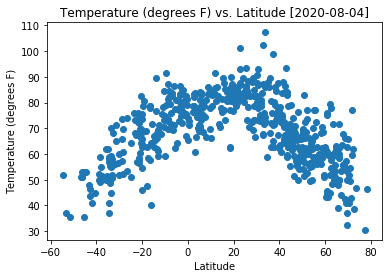

In [107]:
# Generating Temp. vs Latitude

plt.scatter(data_df["Latitude"], data_df["Temperature (degrees F)"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (degrees F)")
plt.title(f"Temperature (degrees F) vs. Latitude [{date}]")


plt.savefig("./output_files/lat_temp.png")

Shows Temperature vs Latitude for randomly selected cities. The peak to the right of zero agrees with the fact that it is summer in the northern hemisphere and winter in the southern hemisphere today

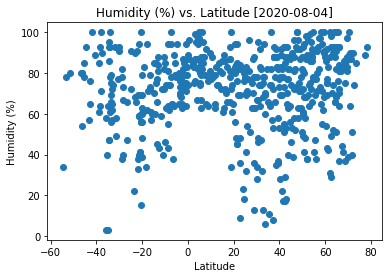

In [108]:
# Generating Humidity vs Latitude

plt.scatter(data_df["Latitude"], data_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Humidity (%) vs. Latitude [{date}]")
plt.savefig("./output_files/lat_hum.png")

Humidities reach lower values in the Northern hemisphere, due to summer. Everything at the equator (Latitude 0) is very humid.

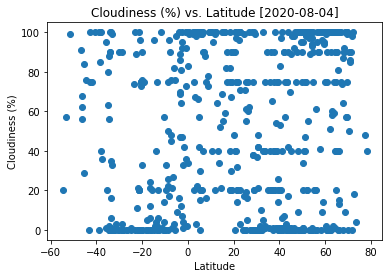

In [109]:
# Generating Cloudiness vs Latitude

plt.scatter(data_df["Latitude"], data_df["Clouds (%)"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Cloudiness (%) vs. Latitude [{date}]")
plt.savefig("./output_files/lat_cloud.png")

Some apparent clustering at zero cloudiness and 100% cloudiness. Maybe more 100% cloudy cities in the north.

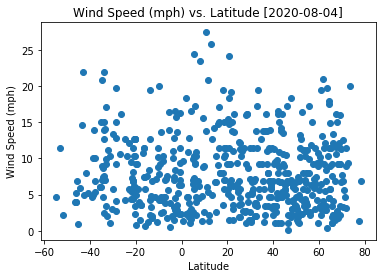

In [110]:
# Generating Wind Speed vs Latitude

plt.scatter(data_df["Latitude"], data_df["Winds Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed (mph) vs. Latitude [{date}]")
plt.savefig("./output_files/lat_wind.png")

Wind speed seems to have little correlation with latitude.

In [111]:
# Creating separate dataframes for northern and southern hemisphere

north = data_df.loc[data_df["Latitude"] > 0]

south = data_df.loc[data_df["Latitude"] < 0]

# Converting Southern Hemisphere latitudes to absolute values (degrees from equator)

south['Latitude'] = south['Latitude'].abs()

south['Latitude'].head()

c:\users\potas\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


1     53.15
4     37.62
7     34.53
9      0.60
12    46.19
Name: Latitude, dtype: float64

In [112]:
def linreg(hemisphere, hemi_string, coordinate):
    plt.scatter(hemisphere["Latitude"], hemisphere[coordinate])
    plt.xlabel("Degrees from Equator")
    plt.ylabel(coordinate)
    plt.title(f"{coordinate} vs. Latitude [{date}] for {hemi_string} hemisphere")
    #plt.savefig(f"./output_files/{coordinate[0:3]}_{hemi_string}.png")
    
    # Pulling this largely from my own work at 
    # https://github.com/cullen-andrews/matplotlib-challenge/blob/master/matplotlib.ipynb
    (slope, intercept, rvalue, pvalue, stderr) = linregress(hemisphere["Latitude"], hemisphere[coordinate])

    regress_values = hemisphere["Latitude"] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(hemisphere["Latitude"], hemisphere[coordinate])
    plt.plot(hemisphere["Latitude"],regress_values,"b-")
    #plt.annotate(line_eq,fontsize=15,color="blue")
    
    plt.savefig(f"./output_files/{coordinate[0:3]}_{hemi_string}.png")
    
    print(f"Equation of Linear Regression:  {line_eq}")
    print(f"Correlation Coefficent: r = {rvalue}")

Equation of Linear Regression:  y = -0.46x + 87.97
Correlation Coefficent: r = -0.7025109357839463


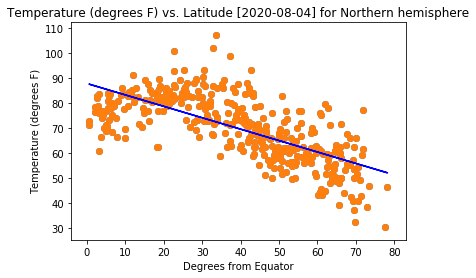

In [113]:
linreg(north, "Northern", "Temperature (degrees F)")

Equation of Linear Regression:  y = -0.73x + 80.71
Correlation Coefficent: r = -0.7856056751108874


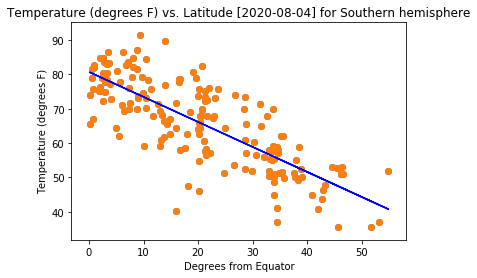

In [114]:
linreg(south, "Southern", "Temperature (degrees F)")

Decent linear correlations between temperature and degrees from the equator for both hemispheres. r-values getting somewhat close to -1. Nice trend towards lower temperature further from the equator.

Equation of Linear Regression:  y = 0.0x + 73.09
Correlation Coefficent: r = 0.00391255913838539


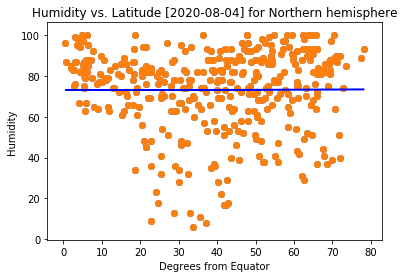

In [115]:
linreg(north, "Northern", "Humidity")

Equation of Linear Regression:  y = -0.11x + 71.66
Correlation Coefficent: r = -0.08347446871576199


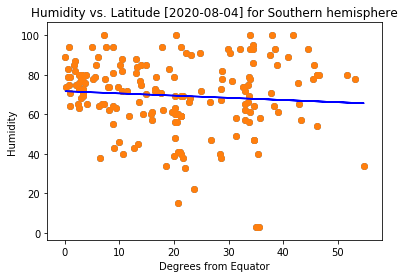

In [116]:
linreg(south, "Southern", "Humidity")

No linear correlation between humidity and distance from the equator for either hemisphere. r-values close to zero.

Equation of Linear Regression:  y = -0.01x + 54.85
Correlation Coefficent: r = -0.006634518829732339


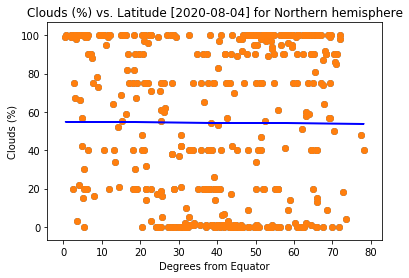

In [117]:
linreg(north, "Northern", "Clouds (%)")

Equation of Linear Regression:  y = 0.1x + 38.72
Correlation Coefficent: r = 0.034741835196100905


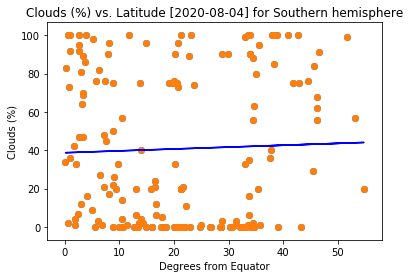

In [118]:
linreg(south, "Southern", "Clouds (%)")

No linear relationship between cloudiness and distance from the equator for either hemisphere.

Equation of Linear Regression:  y = -0.02x + 8.71
Correlation Coefficent: r = -0.08764122628523947


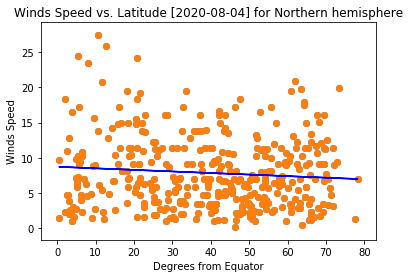

In [119]:
linreg(north, "Northern", "Winds Speed")

Equation of Linear Regression:  y = 0.04x + 7.03
Correlation Coefficent: r = 0.10444725162894375


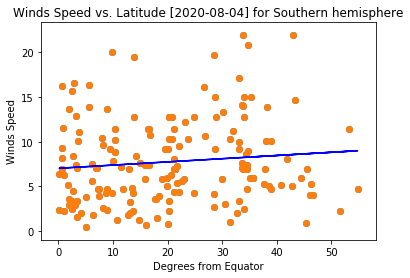

In [120]:
linreg(south, "Southern", "Winds Speed")

No linear relationship between wind speed and distance from the equator.